In [1]:
cd /media/sf_datasets/Smarter\ Devices/BLUED_extracted/BLUED-TK/

/media/sf_datasets/Smarter Devices/BLUED_extracted/BLUED-TK


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import cross_val_score
import sklearn.utils
from sklearn.model_selection import train_test_split as tts,cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn import over_sampling as os
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import pylab as pl
from pprint import pprint
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors

In [3]:
#reading the dataframe
df=pd.read_table('final_events/final_peaks_updated_new.txt',index_col=0,sep=',')

In [4]:
# cols=[str(i) for i in range(70)]
# cols+=['labels','phase']

#for i in range(7):
#df.columns=cols
#finding the single event devices
freq=df.groupby('labels').count()
single_freq=list(freq[freq['0']==1].index)
print ()
df=df[df['phase']=='B']
del df['phase']



# #eliminating refrigerator
# #df=(df[df['label']!=111])
# #eliminating monitor
# # df=(df[df['label']!=140])
# # print(len(df))
# # printing the values by count
# # df.groupby('label').count().sort_values(by='features')


#eliminating all the single event devices
for i in single_freq:
    df=(df[df['labels']!=i])
# for i in range(0,9):
#     del df[str(i)]
# for i in range(12,299):
#     del df[str(i)]
    
print("Events left after removal of single events %d"%len(df))

#df=_df


device_list=df['labels'].unique()
print('output devices %s'%len(device_list))
# scaler = preprocessing.StandardScaler().fit(feature_matrix)



Events left after removal of single events 1436
output devices 23


In [5]:
#df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,labels
0,-0.117789,0.788896,0.915410,0.809981,0.725638,0.704553,0.809981,0.788896,0.873238,0.852153,...,0.894324,0.809981,0.957581,1.041924,0.936495,0.831067,0.894324,0.788896,0.936495,135
1,-0.461704,-0.461704,-0.398447,-0.735818,-0.735818,-0.672561,-0.735818,-0.630390,-0.756904,-0.714732,...,-0.946675,-0.925589,-0.756904,-0.904504,-0.862332,-0.862332,-1.052104,-0.904504,-0.799075,140
2,0.130877,0.447162,0.932133,0.953219,1.037562,0.447162,0.278477,0.531505,0.700190,0.468248,...,1.121904,1.227333,0.489333,0.889962,0.742362,1.079733,0.636933,1.079733,0.995390,128
4,-0.921953,-1.786467,-2.018409,-2.355780,-2.355780,-2.229266,-2.334695,-2.397952,-2.271438,-2.208181,...,-2.060581,-2.039495,-1.891895,-2.039495,-2.144923,-1.997324,-2.187095,-2.081666,-1.934067,129
5,-0.097430,-0.013087,27.588085,27.440485,28.136313,28.094142,28.009799,28.178484,27.777856,27.672428,...,3.023253,3.107595,2.875653,2.938910,3.044338,2.959995,2.875653,3.086510,2.938910,204
6,-0.082161,0.149781,1.562523,1.309494,1.140809,1.035380,0.761266,0.676923,0.740181,0.634752,...,0.529324,0.508238,0.550409,1.372751,1.246237,1.077552,1.330580,1.351666,1.309494,152
8,-0.600578,0.010907,0.622392,0.116335,0.179592,0.200678,0.053078,0.095250,0.200678,0.137421,...,-0.199950,-0.073436,0.010907,-0.136693,-0.094522,-0.073436,-0.178864,-0.221036,-0.052350,159
9,0.006544,0.955400,1.229514,0.723457,0.596943,0.596943,0.618029,0.618029,0.596943,0.428258,...,0.512600,0.554772,0.512600,0.280658,0.449343,0.618029,0.280658,0.428258,0.575857,159
10,-0.117062,0.135967,-0.370090,-0.327919,-0.243576,-0.285747,-0.433347,-0.180319,-0.285747,-0.370090,...,-0.454433,-0.222490,-0.370090,-0.433347,-0.285747,-0.222490,-0.306833,-0.243576,-0.264662,149
11,0.077072,-3.043611,-3.064697,-2.980354,-2.938182,-2.959268,-2.938182,-2.896011,-2.959268,-2.853840,...,-2.896011,-2.938182,-2.980354,-2.853840,-2.896011,-2.896011,-3.022525,-2.874925,-2.938182,204


In [6]:
# freq=df.groupby('labels').count()
# freq['0'].sort_values()

In [7]:
#convert the dataframe to matrix
labels=np.array(df['labels'])
del df['labels']
feature_matrix=df.as_matrix()
print(len(set(labels)))
inputs=feature_matrix.shape[1]
outputs=len(device_list)
total_events=len(df)

print (labels)

print('Total events is %s'%(total_events))

23
[135 140 128 ..., 155 134 134]
Total events is 1436


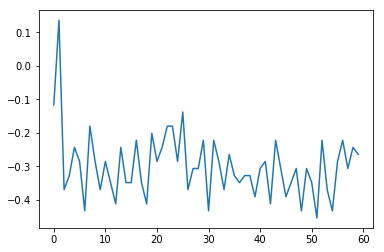

In [8]:
plt.plot(feature_matrix[78].reshape(-1,1))
plt.show()
                    

In [9]:
# feature_matrix=(feature_matrix-feature_matrix.mean(axis=0))/feature_matrix.var(axis=0)
scaler = preprocessing.StandardScaler().fit(feature_matrix)
feature_matrix=scaler.transform(feature_matrix)
print (feature_matrix.shape,labels.shape)
feature_train, feature_test, label_train, label_test = tts(feature_matrix, labels, test_size=0.25, random_state=42,stratify=labels)
# ros = RandomOverSampler(random_state=42)
# feature_train,label_train = ros.fit_sample(feature_train, label_train) 
print('feature_train.shape=%s label_train.shape=%s'%(feature_train.shape,label_train.shape)) 
print('inputs=%d output=%d'%(inputs,outputs))

(1436, 60) (1436,)
feature_train.shape=(1077, 60) label_train.shape=(1077,)
inputs=60 output=23


In [10]:
# clf = DecisionTreeClassifier()
# scores = cross_val_score(clf,feature_matrix,labels,cv=StratifiedKFold(n_splits=4,shuffle=True))
# print (scores, scores.mean())
# clf = clf.fit(feature_train,label_train)
# print (classification_report(label_test,clf.predict(feature_test),digits=4))

[ 0.73369565  0.70833333  0.69382022  0.69886364] 0.708678211647
             precision    recall  f1-score   support

        103     0.3333    0.3333    0.3333         6
        112     0.7500    1.0000    0.8571         3
        118     0.7273    1.0000    0.8421         8
        120     1.0000    0.3333    0.5000         3
        123     1.0000    0.6000    0.7500         5
        128     0.3529    0.3158    0.3333        19
        129     0.7692    0.9091    0.8333        11
        131     1.0000    1.0000    1.0000        35
        134     1.0000    0.9000    0.9474        10
        135     0.5000    1.0000    0.6667         1
        140     0.5714    0.5263    0.5479        38
        149     0.2143    0.2308    0.2222        13
        150     0.4444    0.6667    0.5333         6
        151     0.3333    0.2500    0.2857         4
        152     0.7333    0.6875    0.7097        16
        153     0.0000    0.0000    0.0000         1
        155     0.5000    0.4286 

In [11]:
# '''SVM'''
# # clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
# # clf = clf.fit(feature_train,label_train)
# # result = clf.predict(feature_test)
# # accuracy_score(label_test,result)
# # print (classification_report(label_test,result,digits=4))

# # scores = cross_val_score(clf, feature_matrix, labels)
# # scores.mean()  
# # clf = ExtraTreesClassifier(n_estimators=150)
# # scores = cross_val_score(clf, feature_matrix, labels, cv=10)
# # scores.mean()
# # clf = clf.fit(feature_train,label_train)
# clf = svm.SVC(C=1.0,kernel='rbf',cache_size=1000,decision_function_shape='ovr',shrinking=True,probability=True)
# scores = cross_val_score(clf,feature_matrix,labels,cv=StratifiedKFold(n_splits=4,shuffle=True))
# print (scores, scores.mean())
# clf.fit(feature_train, label_train)
# # clf = AdaBoostClassifier(n_estimators=100)
# # clf = clf.fit(feature_train,label_train)
# result = clf.predict(feature_test)
# accuracy_score(label_test,result)
# print (classification_report(label_test,result,digits=4))

[ 0.52445652  0.52777778  0.5252809   0.55397727] 0.53287311778
             precision    recall  f1-score   support

        103     0.0000    0.0000    0.0000         6
        112     0.0000    0.0000    0.0000         3
        118     0.0000    0.0000    0.0000         8
        120     0.0000    0.0000    0.0000         3
        123     0.0000    0.0000    0.0000         5
        128     0.0000    0.0000    0.0000        19
        129     0.0000    0.0000    0.0000        11
        131     0.9211    1.0000    0.9589        35
        134     1.0000    0.9000    0.9474        10
        135     0.0000    0.0000    0.0000         1
        140     0.2011    1.0000    0.3348        38
        149     0.0000    0.0000    0.0000        13
        150     0.0000    0.0000    0.0000         6
        151     0.0000    0.0000    0.0000         4
        152     0.0000    0.0000    0.0000        16
        153     0.0000    0.0000    0.0000         1
        155     0.5000    0.0714  

/opt/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# gnb = GaussianNB()
# scores = cross_val_score(gnb,feature_matrix,labels,cv=StratifiedKFold(n_splits=4,shuffle=True))
# print (scores, scores.mean())
# gnb = gnb.fit(feature_train,label_train)
# result = gnb.predict(feature_test)
# print (classification_report(label_test,result,digits=4))

[ 0.27717391  0.375       0.37640449  0.375     ] 0.350894601856
             precision    recall  f1-score   support

        103     0.0000    0.0000    0.0000         6
        112     0.3333    0.3333    0.3333         3
        118     0.1795    0.8750    0.2979         8
        120     0.1429    0.3333    0.2000         3
        123     0.7143    1.0000    0.8333         5
        128     0.0000    0.0000    0.0000        19
        129     0.1628    0.6364    0.2593        11
        131     0.8974    1.0000    0.9459        35
        134     0.6923    0.9000    0.7826        10
        135     0.0000    0.0000    0.0000         1
        140     0.4286    0.2368    0.3051        38
        149     0.2857    0.1538    0.2000        13
        150     0.3000    0.5000    0.3750         6
        151     0.0769    0.2500    0.1176         4
        152     0.0833    0.0625    0.0714        16
        153     0.0000    0.0000    0.0000         1
        155     1.0000    0.1429 

/opt/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
# clf = neighbors.KNeighborsClassifier(weights='uniform',algorithm='auto',n_jobs=-1)
# scores = cross_val_score(clf,feature_matrix,labels,cv=StratifiedKFold(n_splits=4,shuffle=True))
# print (scores, scores.mean())
# clf = clf.fit(feature_train,label_train)
# result = clf.predict(feature_test)
# accuracy_score(label_test,result)
# print (classification_report(label_test,result,digits=4))

[ 0.71195652  0.68055556  0.68539326  0.67613636] 0.68851042484
             precision    recall  f1-score   support

        103     0.5000    0.1667    0.2500         6
        112     0.0000    0.0000    0.0000         3
        118     0.5556    0.6250    0.5882         8
        120     0.0000    0.0000    0.0000         3
        123     1.0000    0.8000    0.8889         5
        128     0.2500    0.2105    0.2286        19
        129     0.7692    0.9091    0.8333        11
        131     0.9167    0.9429    0.9296        35
        134     1.0000    0.9000    0.9474        10
        135     0.0000    0.0000    0.0000         1
        140     0.6154    0.6316    0.6234        38
        149     0.2632    0.3846    0.3125        13
        150     0.2500    0.3333    0.2857         6
        151     0.2500    0.2500    0.2500         4
        152     0.7059    0.7500    0.7273        16
        153     0.0000    0.0000    0.0000         1
        155     0.3158    0.4286  

In [14]:
# '''Random Forests'''
# clf = RandomForestClassifier(n_estimators=150,max_features=5,n_jobs=-1,criterion='gini')
# scores = cross_val_score(clf,feature_matrix,labels,cv=StratifiedKFold(n_splits=4,shuffle=True))
# print (scores, scores.mean())
# clf = clf.fit(feature_train,label_train)
# result = clf.predict(feature_test)
# accuracy_score(label_test,result)
# print (classification_report(label_test,result,digits=4))

[ 0.77717391  0.775       0.8005618   0.79261364] 0.78633733679
             precision    recall  f1-score   support

        103     0.3333    0.1667    0.2222         6
        112     1.0000    0.6667    0.8000         3
        118     0.7143    0.6250    0.6667         8
        120     0.4000    0.6667    0.5000         3
        123     1.0000    1.0000    1.0000         5
        128     0.9000    0.4737    0.6207        19
        129     0.6875    1.0000    0.8148        11
        131     1.0000    1.0000    1.0000        35
        134     1.0000    1.0000    1.0000        10
        135     1.0000    1.0000    1.0000         1
        140     0.5283    0.7368    0.6154        38
        149     0.4167    0.3846    0.4000        13
        150     0.5714    0.6667    0.6154         6
        151     0.5000    0.5000    0.5000         4
        152     0.8824    0.9375    0.9091        16
        153     1.0000    1.0000    1.0000         1
        155     0.6364    0.5000  

In [15]:
'''Extra Forests'''
clf = ExtraTreesClassifier(n_estimators=200,n_jobs=-1,max_features=30,criterion='gini')
scores = cross_val_score(clf,feature_matrix,labels,cv=StratifiedKFold(n_splits=4,shuffle=True))
print (scores, scores.mean())
clf = clf.fit(feature_train,label_train)
result = clf.predict(feature_test)
accuracy_score(label_test,result)
print (classification_report(label_test,result,digits=4))
print (clf.max_depth)
clf.get_params()# print(classification_report_imbalanced(label_test, result))
clf.score(feature_test,label_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#print ('hlo',clf.oob_score_)


[ 0.7826087   0.81111111  0.83146067  0.78693182] 0.803028074776
             precision    recall  f1-score   support

        103     0.3333    0.1667    0.2222         6
        112     1.0000    0.6667    0.8000         3
        118     0.7500    0.7500    0.7500         8
        120     0.2500    0.3333    0.2857         3
        123     1.0000    1.0000    1.0000         5
        128     0.8333    0.5263    0.6452        19
        129     0.7333    1.0000    0.8462        11
        131     1.0000    1.0000    1.0000        35
        134     1.0000    1.0000    1.0000        10
        135     1.0000    1.0000    1.0000         1
        140     0.5714    0.7368    0.6437        38
        149     0.5000    0.3846    0.4348        13
        150     0.8000    0.6667    0.7273         6
        151     0.4000    0.5000    0.4444         4
        152     0.7778    0.8750    0.8235        16
        153     0.0000    0.0000    0.0000         1
        155     0.5000    0.4286 

In [16]:
#print (model_selection.validation_curve(ExtraTreesClassifier(n_estimators=200,n_jobs=-1,max_features=8,criterion='gini'),feature_matrix,labels,n_jobs=-1))

[[ 1  0  0  0  0  0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  6  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 10  0  0  0  0  2  0  0  1  0  0  2  0  2  0  0  0  1]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0 28  1  0  0  1  0  0  2  1  1  0  0  2]
 [ 0  0  0  0  0  1  0  0  0  0  3  5  0  1  0  0  1  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  4  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  0  0

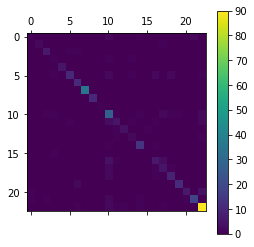

In [17]:
# cm=sklearn.metrics.confusion_matrix(label_test,result )
# print(cm)
# pl.matshow(cm)
# pl.colorbar()
# pl.show()

In [18]:
# '''Neural Nets'''
# clf = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,max_features=10,criterion='gini')
# scores = cross_val_score(clf,feature_matrix,labels,cv=StratifiedKFold(n_splits=2,shuffle=True))
# print (scores, scores.mean())
# clf = clf.fit(feature_train,label_train)
# result = clf.predict(feature_test)
# accuracy_score(label_test,result)
# print (classification_report(label_test,result,digits=4))